In [1]:
import pandas as pd
from plotting_utils import *
from plotting_ACs import *
from clustering_utils import *

Load data and plot BIC curves

In [2]:
gmm_results = pd.read_pickle('Data/ACs/Dataframes/gmm_pcaColor_2Components_features.pkl')
data = pd.read_pickle('Data/ACs/Dataframes/control_data.pkl')
assert len(data) == len(gmm_results['Predictions'].iloc[0])
final_results = bayes_factor(gmm_results)

In [3]:
final_results

,Seed,Covariance type,Nb components,Predictions,Bayes Factor
0,0,diag,35,"[20, 18, 18, 20, 18, 22, 18, 18, 18, 18, 13, 2...","[16642.745295837114, 17013.867814942612, 6326...."
1,2,full,6,"[2, 3, 3, 2, 3, 2, 3, 3, 3, 1, 3, 2, 2, 1, 3, ...","[11164.365318533557, 3133.078279082023, 1290.9..."
2,11,tied,24,"[17, 1, 1, 13, 1, 19, 1, 1, 1, 1, 21, 19, 23, ...","[297.6359880490345, 2355.2463959809393, 1123.2..."
3,10,spherical,46,"[36, 40, 40, 36, 40, 31, 40, 40, 40, 40, 6, 14...","[11508.091510191152, 14459.725662441808, 6249...."


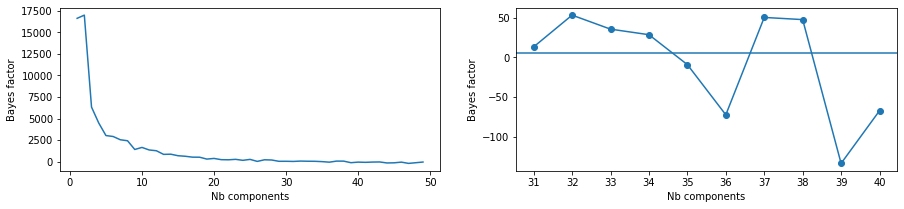

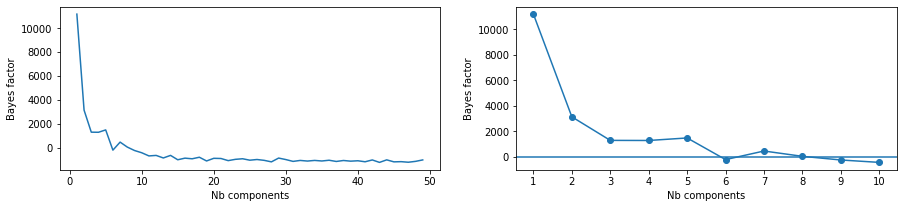

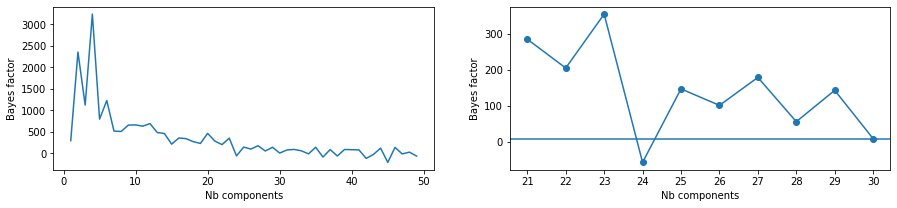

In [4]:
# Plot Bayes Factor

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.xlabel('Nb components')
plt.ylabel('Bayes factor')
plt.plot(np.arange(1,50), final_results['Bayes Factor'].iloc[0])
plt.subplot(1,2,2)
plt.xlabel('Nb components')
plt.ylabel('Bayes factor')
plt.plot(np.arange(1,50)[30:40], final_results['Bayes Factor'].iloc[0][30:40], 'o-')
plt.axhline(6)
plt.xticks(np.arange(31,41))
plt.show()

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.xlabel('Nb components')
plt.ylabel('Bayes factor')
plt.plot(np.arange(1,50), final_results['Bayes Factor'].iloc[1])
plt.subplot(1,2,2)
plt.xlabel('Nb components')
plt.ylabel('Bayes factor')
plt.plot(np.arange(1,50)[0:10], final_results['Bayes Factor'].iloc[1][0:10], 'o-')
plt.axhline(6)
plt.xticks(np.arange(1,11))
plt.show()

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.xlabel('Nb components')
plt.ylabel('Bayes factor')
plt.plot(np.arange(1,50), final_results['Bayes Factor'].iloc[2])
plt.subplot(1,2,2)
plt.xlabel('Nb components')
plt.ylabel('Bayes factor')
plt.plot(np.arange(1,50)[20:30], final_results['Bayes Factor'].iloc[2][20:30], 'o-')
plt.axhline(6)
plt.xticks(np.arange(21,31))
plt.show()

Permute cluster IDs

In [5]:
data['cluster ID (tied)'] = final_results['Predictions'].loc[final_results['Covariance type'] == 'tied'].to_numpy()[0]
data['cluster ID (tied)'] = permute_clusterIDs(data, 'cluster ID (tied)')

data['cluster ID (full)'] = final_results['Predictions'].loc[final_results['Covariance type'] == 'full'].to_numpy()[0]
data['cluster ID (full)'] = permute_clusterIDs(data, 'cluster ID (full)')

data['cluster ID (diag)'] = final_results['Predictions'].loc[final_results['Covariance type'] == 'diag'].to_numpy()[0]
data['cluster ID (diag)'] = permute_clusterIDs(data, 'cluster ID (diag)')

Plot tied clustering

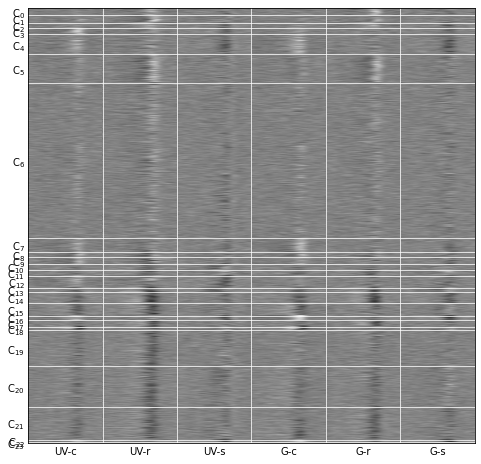

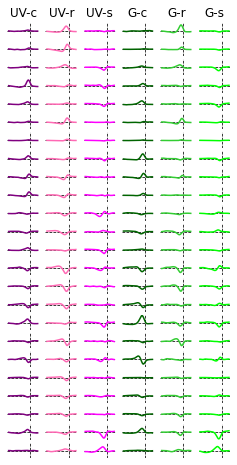

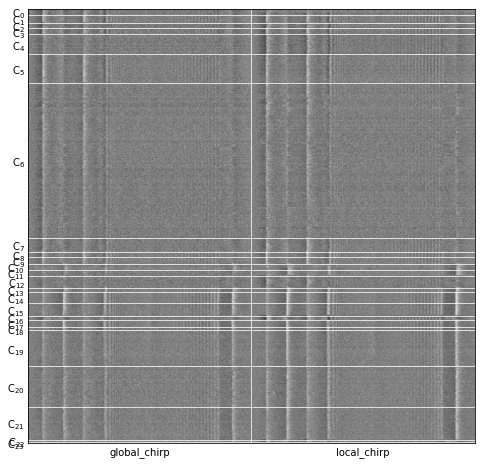

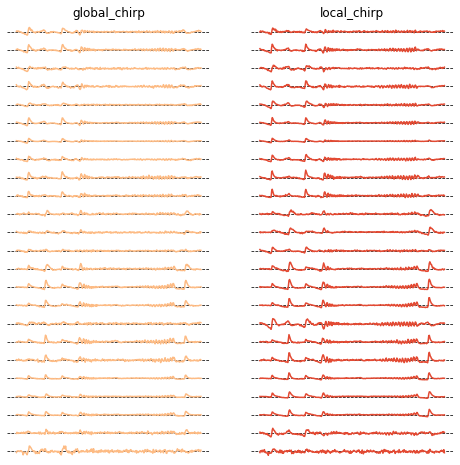

In [6]:
name = 'cluster ID (tied)'

plot_Kernels(data, name)
plot_Chirp(data, name)

Plot full clustering

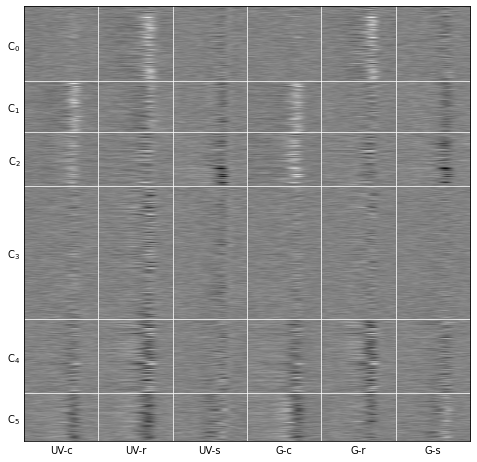

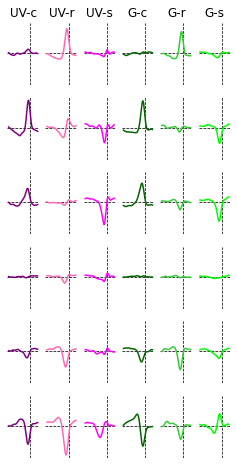

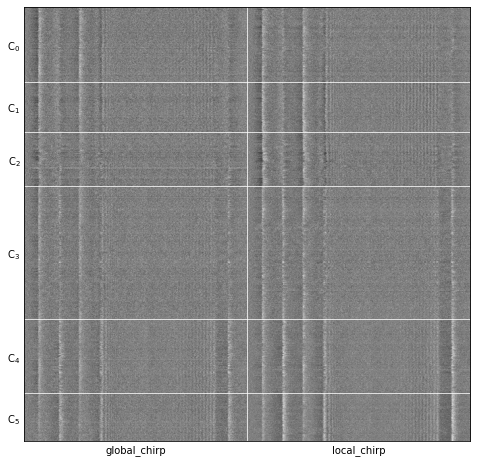

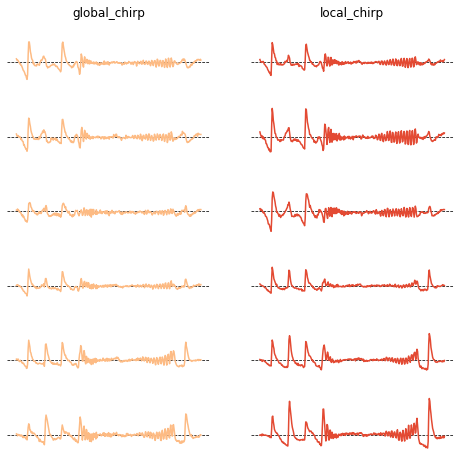

In [7]:
name = 'cluster ID (full)'

plot_Kernels(data, name)
plot_Chirp(data, name)

Plot diagonal clustering

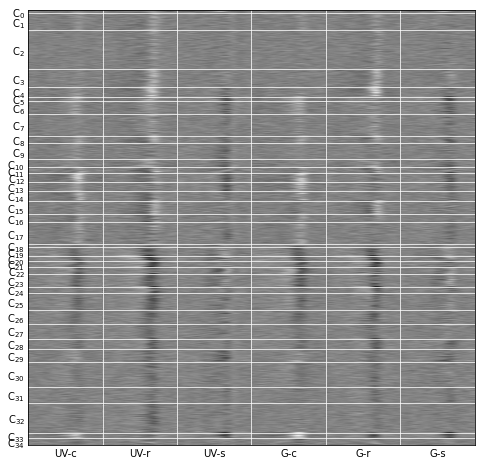

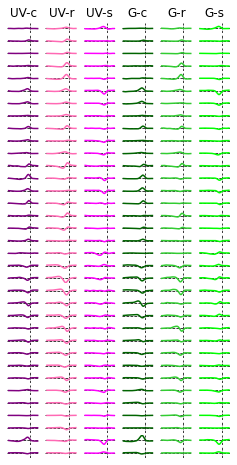

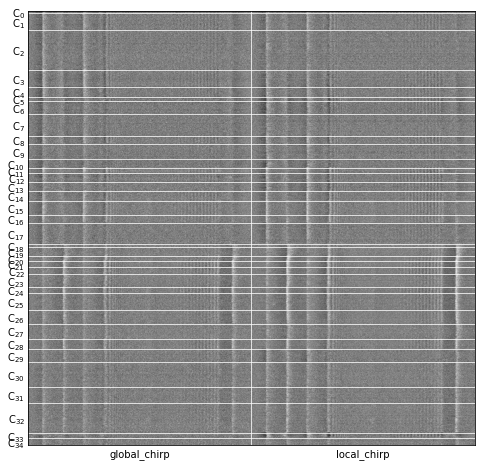

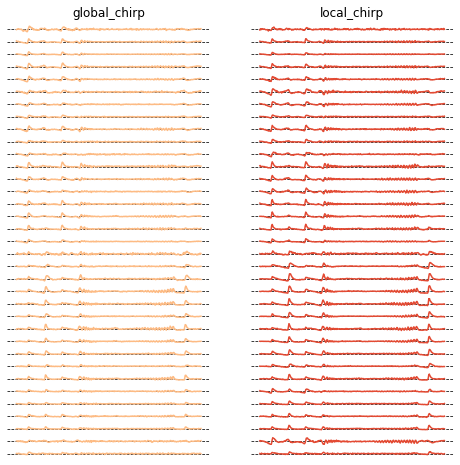

In [8]:
name = 'cluster ID (diag)'

plot_Kernels(data, name)
plot_Chirp(data, name)